## Mecánica de Sólidos
### Ramón Zúñiga   Instituto de Geociencias UNAM
### **Análisis del Tensor de Deformación**
En este ejercicio, analizamos un **tensor de deformación 3D**. Calcularemos las **deformaciones principales**, sus **direcciones principales** y las visualizaremos en 3D.

\begin{equation}
\boldsymbol{\epsilon} = 
\begin{bmatrix}
\epsilon_{11} & \epsilon_{12} & \epsilon_{13} \\
\epsilon_{21} & \epsilon_{22} & \epsilon_{23} \\
\epsilon_{31} & \epsilon_{32} & \epsilon_{33} 
\end{bmatrix} =
\begin{bmatrix}
\epsilon_{xx} & \epsilon_{xy} & \epsilon_{xz} \\
\epsilon_{yx} & \epsilon_{yy} & \epsilon_{yz} \\
\epsilon_{zx} & \epsilon_{zy} & \epsilon_{zz} 
\end{bmatrix} =
\begin{bmatrix}
\epsilon_{xx} & \gamma_{xy}/2 & \gamma_{xz}/2 \\
\gamma_{yx}/2 & \epsilon_{yy} & \gamma_{yz}/2 \\
\gamma_{zx}/2 & \gamma_{zy}/2 & \epsilon_{zz} 
\end{bmatrix}
\end{equation}


donde:

$ (\varepsilon_{xx}, \varepsilon_{yy}, \varepsilon_{zz}) $ son las **deformaciones normales** en las direcciones $ (x, y, z) $ ,
$ (\gamma_{xy}, \gamma_{xz}, \gamma_{yz})$ o $ (\varepsilon_{xy}, \varepsilon_{xz}, \varepsilon_{yz}) $ son las **deformaciones cortantes** en los planos correspondientes.

## NOTA: Importante recordar que las deformaciones ingenieriles equivalen a:

\begin{equation} \gamma_{ij} = 2 \epsilon_{ij} \end{equation}

Para este ejemplo, usamos el siguiente **tensor de deformación**:

\begin{equation}
\varepsilon =
\begin{bmatrix}
0.005 & 0.001 & 0.002 \\
0.001 & 0.004 & 0.003 \\
0.002 & 0.003 & 0.006
\end{bmatrix}
\end{equation}

In [19]:
# Cargar librerías necesarias
using LinearAlgebra
using Plots


In [20]:
# Definir el tensor de deformación (Matriz Simétrica 3x3)
ϵ = [ 0.005  0.001  0.002;   # ϵ_xx  γ_xy  γ_xz
      0.001  0.004  0.003;   # γ_xy  ϵ_yy  γ_yz
      0.002  0.003  0.006 ]  # γ_xz  γ_yz  ϵ_zz

3×3 Matrix{Float64}:
 0.005  0.001  0.002
 0.001  0.004  0.003
 0.002  0.003  0.006


## **Tensor de Deformación**
El tensor de deformación en este ejemplo es:


In [21]:
display(ϵ)

# Calcular valores y vectores propios (deformaciones principales y direcciones principales)
valores_propios, vectores_propios = eigen(ϵ)

3×3 Matrix{Float64}:
 0.005  0.001  0.002
 0.001  0.004  0.003
 0.002  0.003  0.006

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.0017853725926048093
 0.003914800384562895
 0.009299827022832295
vectors:
3×3 Matrix{Float64}:
 -0.144438   0.877135  -0.458008
 -0.772479  -0.389217  -0.501784
  0.618397  -0.281325  -0.733786


## **Deformaciones Principales**
Las deformaciones principales (valores propios del tensor de deformación) son:


In [22]:
display(valores_propios)


3-element Vector{Float64}:
 0.0017853725926048093
 0.003914800384562895
 0.009299827022832295

## 📌 **Direcciones Principales de Deformación**
Los vectores propios corresponden a las **direcciones principales de deformación**:

In [23]:
display(vectores_propios)

3×3 Matrix{Float64}:
 -0.144438   0.877135  -0.458008
 -0.772479  -0.389217  -0.501784
  0.618397  -0.281325  -0.733786

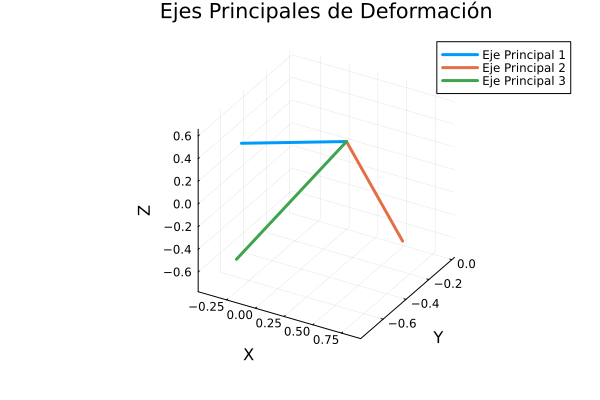

In [24]:
# Función para graficar los ejes principales de deformación
function graficar_deformacion_principal(ϵ)
  
    # 📌 **Visualización del Tensor de Deformación**
    # En la siguiente gráfica, se muestran los **ejes principales de deformación** en 3D.

    
    # Calcular valores y vectores propios (deformaciones principales y direcciones principales)
    valores_propios, vectores_propios = eigen(ϵ)

    # Crear el gráfico 3D con los vectores propios (ejes principales)
    plot()
    for i in 1:3
        plot!([0, vectores_propios[1, i]], 
              [0, vectores_propios[2, i]], 
              [0, vectores_propios[3, i]], 
              label="Eje Principal $i", linewidth=3, arrow=true, grid=true)
    end

    title!("Ejes Principales de Deformación")
    xlabel!("X")
    ylabel!("Y")
    zlabel!("Z")
end

# Llamar a la función para graficar los ejes principales de deformación
graficar_deformacion_principal(ϵ)


## **Deformación Volumétrica**
La **deformación volumétrica** se calcula como la suma de las deformaciones principales o como la suma de la traza del tensor de deformación original:

\begin{equation}
\varepsilon_v = \varepsilon_{xx} + \varepsilon_{yy} + \varepsilon_{zz}
\end{equation}

\begin{equation}
\varepsilon_v = \varepsilon_{1} + \varepsilon_{2} + \varepsilon_{3}
\end{equation}

In [25]:
# Calcular la deformación volumétrica (suma de las deformaciones principales)
ϵsubv = sum(valores_propios)
display(ϵsubv)

0.015

In [26]:
# Calcular la deformación volumétrica (traza del tensor de deformación)
ϵsubv=sum(diag(ϵ))
display(ϵsubv)

0.015000000000000001

In [27]:
# Determinar si el material se expande o se contrae
if ϵsubv  > 0
    estado = "El material **se expande** porque la deformación volumétrica ϵv es > 0."
elseif ϵsubv  < 0
    estado = "El material **se contrae** porque la deformación volumétrica ϵv es < 0."
else
    estado = "El material **no cambia su volumen** porque la deformación volumétrica ϵv es = 0."
end   

"El material **se expande** porque la deformación volumétrica ϵv es > 0."

# Deformación Volumétrica

La **deformación volumétrica** ($\varepsilon_v$) se define como la variación relativa del volumen de un cuerpo debido a una deformación. Matemáticamente, se expresa como:

$$
\varepsilon_v = \frac{\Delta V}{V_0}
$$

donde:

- $\varepsilon_v$ es la deformación volumétrica,
- $\Delta V = V - V_0$ es el cambio de volumen,
- $V_0$ es el volumen inicial,
- $V$ es el volumen final después de la deformación.

En un medio continuo, la deformación volumétrica también puede expresarse en términos de la **traza del tensor de deformaciones**:

$$
\varepsilon_v = \text{tr}(\mathbf{E}) = E_{xx} + E_{yy} + E_{zz}
$$

donde $E_{xx}$, $E_{yy}$ y $E_{zz}$ son las componentes normales del tensor de deformación de Green-Lagrange.

Para **pequeñas deformaciones**, la deformación volumétrica se aproxima a la traza del **tensor de deformaciones infinitesimales**:

$$
\varepsilon_v = \epsilon_{xx} + \epsilon_{yy} + \epsilon_{zz}
$$

donde $\epsilon_{xx}$, $\epsilon_{yy}$ y $\epsilon_{zz}$ son las componentes normales del **tensor de deformaciones infinitesimales**.

